In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
!pip install pandas_datareader


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
start='2010-01-01'
end='2023-12-31'
df=yf.download('TSLA',start=start,end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [4]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

               Volume  
Date                   
2023-12-22   93249800  
2023-12-26   86892400  
2023-12-27  106494400  
2023-12-28  113619900  
2023-12-29  100615300

In [5]:
df=df.reset_index()
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

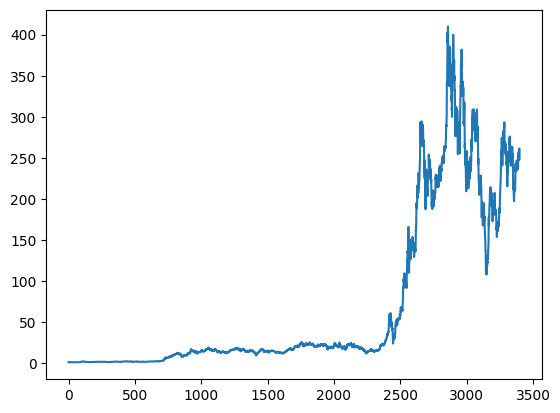

In [6]:
plt.plot(df.Close)

In [7]:
df

Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1    2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2    2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3    2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4    2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...         ...         ...         ...         ...         ...         ...   
3395 2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
3396 2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
3397 2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
3398 2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
3399 2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

         Volume  
0     281494500  
1     257806500  
2     123282000  
3      77097000  
4     103003500  
...         ...  
3395   93249800  
3396   86892400  
3397  106494400  
3398  113619900  
3399  100615300  

[3400 rows x 7 columns]

In [8]:
ma100=df.Close.rolling(100).mean()  #days
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3395    241.505100
3396    241.477999
3397    241.553799
3398    241.571099
3399    241.558899
Name: Close, Length: 3400, dtype: float64

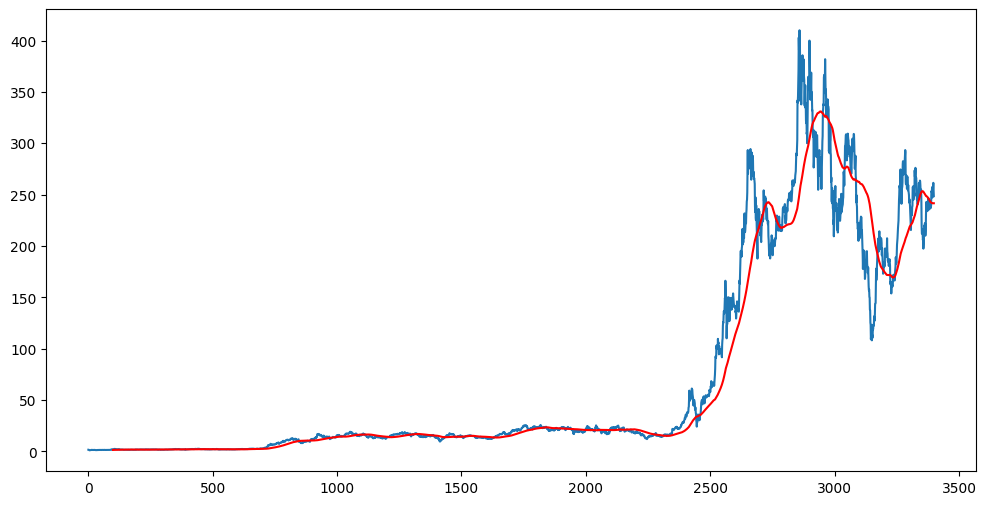

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3395    227.70775
3396    228.12360
3397    228.55840
3398    228.90800
3399    229.24815
Name: Close, Length: 3400, dtype: float64

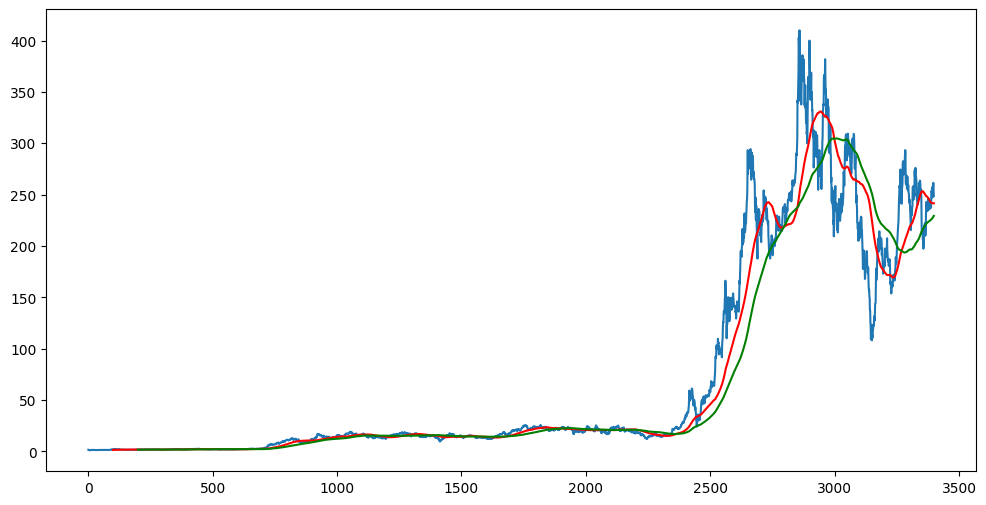

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [12]:
df.shape

(3400, 7)

In [13]:
#splitting data into training and testing
#we are splitting the dataset as training and testing it is divided as 70% training data and rest 30% as testing data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
#creating the dataframe for both training and testing data for the 'Close' attribute 
#tarining the data using dataframe is because it helps to tarin the machine learning models
#testing dataframe used becuase evaluates models performance on unseen data which will tested
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(2380, 1)
(1020, 1)


In [14]:
data_training.head()

Close
0  1.592667
1  1.588667
2  1.464000
3  1.280000
4  1.074000

In [15]:
data_testing.head()

Close
2380  23.513332
2381  23.978666
2382  23.892668
2383  25.433332
2384  25.266001

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array
#scaler.fit_transform will automatically give an array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.86698267],
       [0.87684173],
       [0.90205848]])

In [18]:
data_training_array.shape

(2380, 1)

In [19]:

#assume 10 days and stock prediction on 11th day [34,36,33,40,39,38,37,42,44,38]=assume that predicted value to be 43 which is 11th day data
#the 11th day data will dependent on previous 10 days
#here the first 10 days become the x_train and the 11th which we are going to predict is going to become the y_train
#now for eg if we consider the above 10 days data and if we want to calculate 12th day preddiction the first value in array that is 36 will be gone and the new of 11th day will become the array value
#[36,33,40,39,38,37,42,44,38,43]=12th day data

x_train=[]
y_train=[]
for i in range(100,2380):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
print(x_train)
print(y_train)
x_train,y_train=np.array(x_train),np.array(y_train)

[array([[0.02191227],
       [0.02174975],
       [0.01668473],
       [0.00920911],
       [0.00083967],
       [0.        ],
       [0.00449622],
       [0.0043337 ],
       [0.00338572],
       [0.00633802],
       [0.0109426 ],
       [0.01107802],
       [0.01310944],
       [0.01654932],
       [0.01218851],
       [0.01197184],
       [0.01408452],
       [0.01486999],
       [0.0139491 ],
       [0.01286567],
       [0.01332611],
       [0.01232397],
       [0.01121343],
       [0.01386785],
       [0.01665764],
       [0.01478873],
       [0.0125948 ],
       [0.01026545],
       [0.01029255],
       [0.00874867],
       [0.00568797],
       [0.00487541],
       [0.00682557],
       [0.00807152],
       [0.0090737 ],
       [0.00804442],
       [0.00809861],
       [0.00893824],
       [0.01172807],
       [0.00920911],
       [0.01110511],
       [0.01069883],
       [0.01056338],
       [0.01102386],
       [0.00996752],
       [0.0125948 ],
       [0.01424703],
       [0.01

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


c:\Users\Divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - loss: 0.1167
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0135
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 355ms/step - loss: 0.0125
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 398ms/step - loss: 0.0098
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - loss: 0.0096
Epoch 6/50
68/72 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - loss: 0.0108

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

Close
2380  23.513332
2381  23.978666
2382  23.892668
2383  25.433332
2384  25.266001

In [ ]:
data_training.tail(100)

Close
2280  17.045334
2281  17.344667
2282  17.658667
2283  15.254667
2284  15.202667
...         ...
2375  22.202000
2376  22.024668
2377  22.392668
2378  22.635332
2379  23.256001

[100 rows x 1 columns]

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

Close
0  17.045334
1  17.344667
2  17.658667
3  15.254667
4  15.202667

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00745687],
       [0.008213  ],
       [0.00900617],
       ...,
       [0.62480739],
       [0.60394228],
       [0.59206991]])

In [ ]:
input_data.shape

(1120, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1020, 100, 1)
(1020,)


In [ ]:
##making prediction
y_predicted=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step


In [ ]:
y_predicted.shape

(1020, 1)

In [ ]:
y_test

array([0.02379529, 0.02497074, 0.0247535 , ..., 0.62480739, 0.60394228,
       0.59206991])

In [ ]:
y_predicted

array([[0.03823771],
       [0.0381773 ],
       [0.03811912],
       ...,
       [0.5778775 ],
       [0.58017075],
       [0.58180046]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00252604])

In [ ]:
scale_factor=1/0.00252604
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

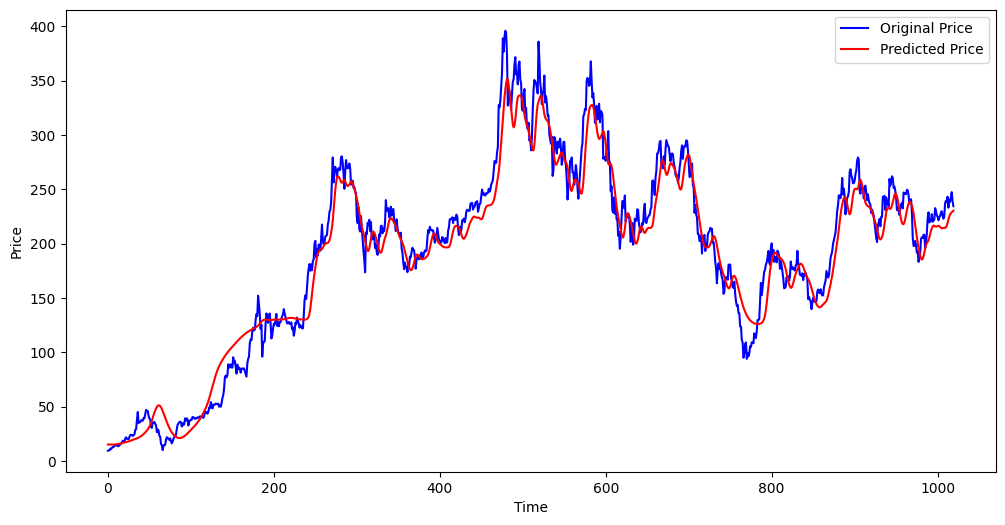

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

